In [0]:
#importing libraries
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im
import matplotlib . cm as cm
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [0]:
#importing Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
def imageMatrix(data):
  img_mat = []
  for i in range(data.shape[0]):
     img = data[i].flatten()
     img_mat.append(img)
  X = np.vstack(img_mat)
  return X

In [0]:
def covarianceMatrix(X):
  mu = np.mean(X, axis = 0)
  X_norm = X - mu
  cov_mat = np.dot(X_norm.T, X_norm)
  return [mu, X_norm, cov_mat]


In [0]:
def PCA(X):
  X = imageMatrix(x_train)
  [mu, X_norm, cov_mat] = covarianceMatrix(X)
  eigen_val, eigen_vec = np.linalg.eig(cov_mat)
  return [mu, X_norm, eigen_val, eigen_vec]

In [0]:
def main(x_train, x_test, y_train, y_test):
  
  [mu, X_norm, eigenval, eigen_vec] = PCA(x_train)
  X_test = imageMatrix(x_test)
  X_test_norm = X_test - mu
 
  accuracy_list = []
  k_values = []

  for k in [100, 200, 300, 400, 500, 600, 700]:
    y_pred = []
    U_reduce = eigen_vec[:, :k]
    Z_train = np.dot(X_norm, U_reduce)
    Z_test = np.dot(X_test_norm, U_reduce)
    for i in range(Z_test.shape[0]):
      index =  np.argmin(np.linalg.norm(Z_test[i] - Z_train, axis=1))
      y_pred.append(y_train[index])

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    k_values.append(k)
  
  return [accuracy_list, k_values]

In [0]:
[accuracy, k_val] = main(x_train, x_test, y_train, y_test)

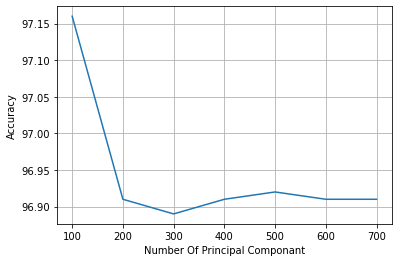

In [19]:
#accuracy graph against principal componants
plt.subplot(111)
plt.plot(k_val, np.array(accuracy)*100)
plt.xlabel('Number Of Principal Componant')
plt.ylabel('Accuracy')
plt.grid()
plt.show()